# TP1

Images can be downloaded here : https://www.bogotobogo.com/Matlab/images/MATLAB_DEMO_IMAGES/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def plot_plt(img, opencv=True):
    if len(img.shape)==3:
        if opencv:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img)
    if len(img.shape)==2:
        plt.imshow(img, cmap='gray')
    
def plot_cv2(img):
    cv2.imshow('image', img)
    # Waits for user to press any key 
    cv2.waitKey(0)
    # Closing all open windows
    cv2.destroyAllWindows() 
    
def imread(path, color_opt=cv2.IMREAD_GRAYSCALE):
    img = cv2.imread(path, color_opt)
    
    if (type(img) is np.ndarray):
        return img
    else:
        print('Error: cannot read image. Path is not correct.')
        return 0

In [3]:
img = imread('Images/pout.tif')
print(img.shape)

img = imread('Images/pout.tif', cv2.IMREAD_GRAYSCALE)
print(img.shape)

(291, 240)
(291, 240)


Text(0.5, 1.0, 'Plot with pyplot with color convertion')

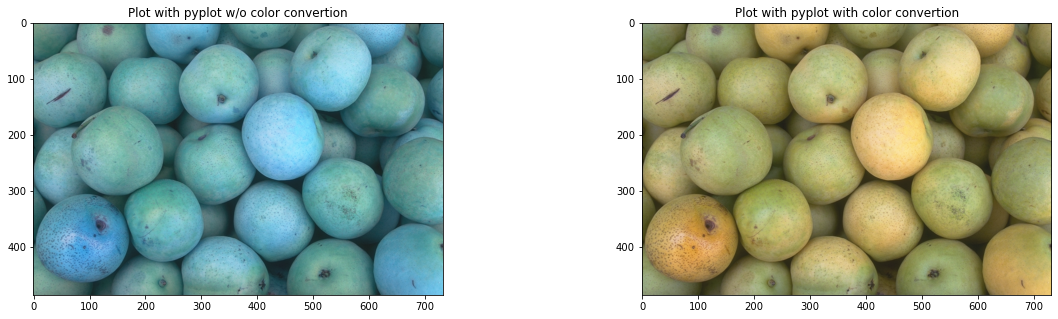

In [18]:
img = imread('Images/pears.png', color_opt=cv2.IMREAD_COLOR)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Plot with pyplot w/o color convertion')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Plot with pyplot with color convertion')

### Read image

In [5]:
def compute_hist(img):
    return cv2.calcHist(img, channels=[0], mask=None, histSize=[256], ranges=[0,256])

(291, 240)


Text(0.5, 1.0, 'Histogram')

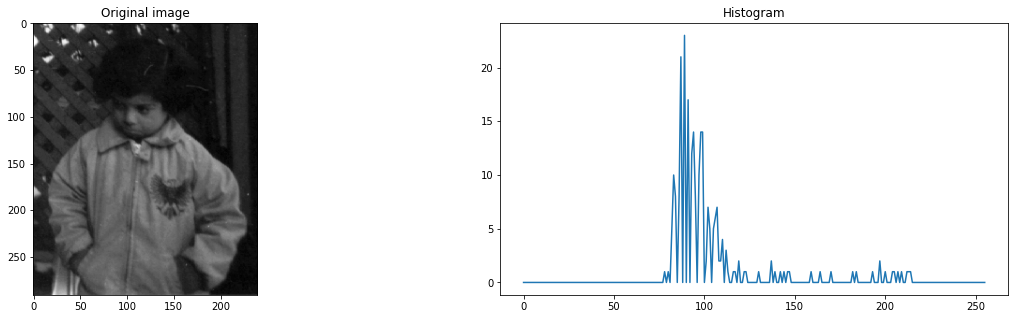

In [6]:
img = imread('Images/pout.tif', cv2.IMREAD_GRAYSCALE)

print(img.shape)

hist_img = compute_hist(img)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plot_plt(img)
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.plot(hist_img)
plt.title('Histogram')

### Inverse grayscale

Text(0.5, 1.0, 'Inversed image histogram')

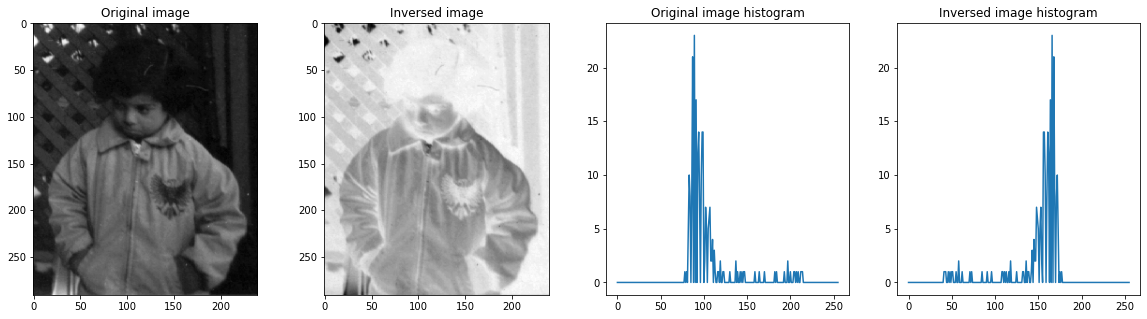

In [11]:
def inv_gray_scale(img):
    img = np.double(img)
    img = 255.0 - img
    img = np.uint8(img)
    
    return img

img_inv = inv_gray_scale(img)

hist_inv = compute_hist(img_inv)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plot_plt(img)
plt.title('Original image')
plt.subplot(1, 4, 2)
plot_plt(img_inv)
plt.title('Inversed image')
plt.subplot(1, 4, 3)
plt.plot(hist_img)
plt.title('Original image histogram')
plt.subplot(1, 4, 4)
plt.plot(hist_inv)
plt.title('Inversed image histogram')

### Dynamic expansion

Text(0.5, 1.0, 'Expanded image histogram')

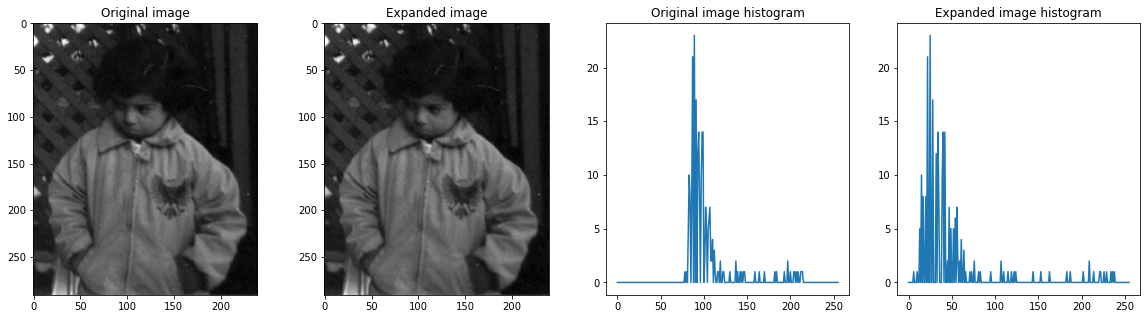

In [13]:
def dyn_exp(img):
    img = np.double(img)
    img_min = np.min(img)
    img_max = np.max(img)
    
    img = (img - img_min) / (img_max - img_min) * 255
    
    img = np.uint8(img)

    return img

img_exp = dyn_exp(img)

hist_exp = compute_hist(img_exp)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plot_plt(img)
plt.title('Original image')
plt.subplot(1, 4, 2)
plot_plt(img_exp)
plt.title('Expanded image')
plt.subplot(1, 4, 3)
plt.plot(hist_img)
plt.title('Original image histogram')
plt.subplot(1, 4, 4)
plt.plot(hist_exp)
plt.title('Expanded image histogram')

### Gamma correction

Text(0.5, 1.0, 'Gamma corrected image histogram')

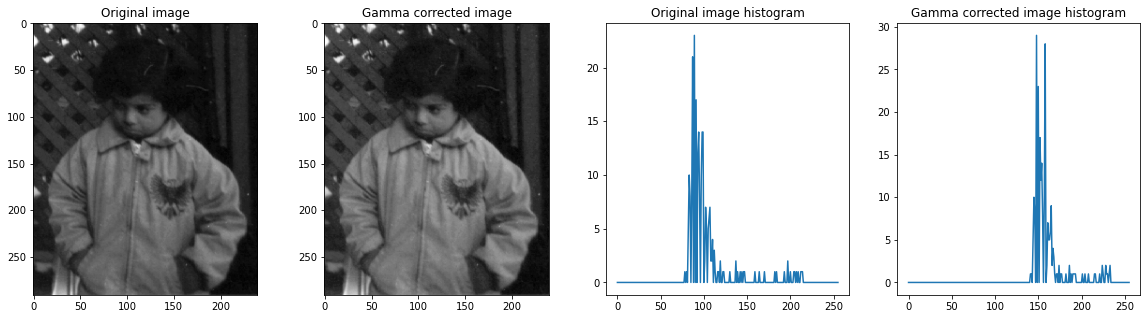

In [14]:
def correction_gamma(img, gamma):
    img = np.double(img) / 255.0
    img = np.power(img, gamma)
    img = np.uint8(img * 255.0)
    
    return img

img_gamma = correction_gamma(img, 0.5)

hist_gamma = compute_hist(img_gamma)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plot_plt(img)
plt.title('Original image')
plt.subplot(1, 4, 2)
plot_plt(img_gamma)
plt.title('Gamma corrected image')
plt.subplot(1, 4, 3)
plt.plot(hist_img)
plt.title('Original image histogram')
plt.subplot(1, 4, 4)
plt.plot(hist_gamma)
plt.title('Gamma corrected image histogram')

### Dynamic expansion color

Text(0.5, 1.0, 'Expanded image')

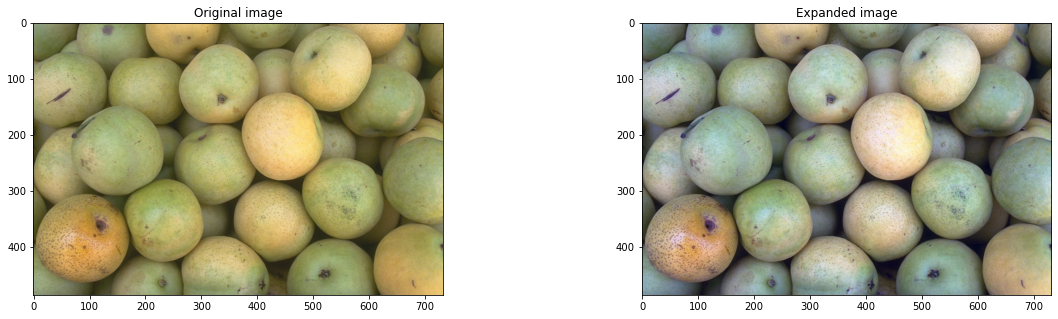

In [16]:
def dyn_exp_color(img_rgb):
    for c in range(img_rgb.shape[2]):
        img_rgb[:,:,c] = dyn_exp(img_rgb[:,:,c])
        
    return img_rgb

img_rgb = cv2.imread('Images/pears.png')

#img_rgb_exp = dyn_exp_color(img_rgb)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plot_plt(img_rgb)
plt.title('Original image')
plt.subplot(1, 2, 2)
plot_plt(img_rgb_exp)
plt.title('Expanded image')

### Colorisation

Text(0.5, 1.0, 'Colorized image')

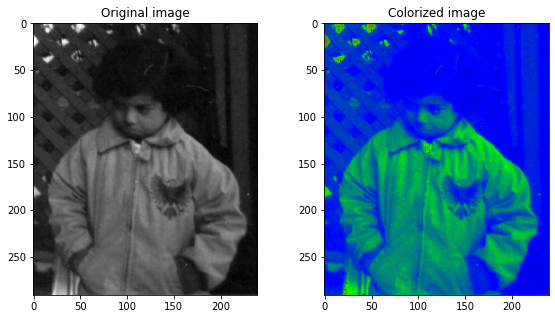

In [17]:
def colorize(img):
    n_rows = img.shape[0]
    n_cols = img.shape[1]
    
    red = np.zeros((255,))
    green = np.zeros((255,))
    blue = np.zeros((255,))
    
    for i in range(1,85):
        red[i] = 0
        green[i] = 0
        blue[i] = 3*i
    
    for i in range(86,170):
        red[i] = 0
        green[i] = 3*(i-86)
        blue[i] = 255 - 3*(i-86)
    
    for i in range(171,255):
        red[i] = 3*(i-171)
        green[i] = 255 - 3*(i-171)
        blue[i] = 0

    img_color = np.zeros((n_rows, n_cols, 3))

    for i in range(n_rows):
        for j in range(n_cols):
            img_color[i,j,0] = red[img[i,j]]
            img_color[i,j,1] = green[img[i,j]]
            img_color[i,j,2] = blue[img[i,j]]
    
    return np.uint8(img_color)

img_color = colorize(img)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.title('Original image')
plot_plt(img)
plt.subplot(1, 4, 2)
plot_plt(img_color, opencv=False)
plt.title('Colorized image')